<a href="https://colab.research.google.com/github/AIsoroush/deep-learning-projects/blob/main/Customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation Project

**Author:** soroush taghados

## Description
این پروژه برای خوشه‌بندی مشتریان یک کسب‌وکار طراحی شده است.  
هدف، دسته‌بندی مشتریان بر اساس رفتار و ویژگی‌های کلیدی آنها مانند درآمد و امتیاز هزینه‌کرد است تا تحلیل بازاریابی و تصمیم‌گیری هوشمندانه‌تر انجام شود.

## Dataset
ویژگی‌ها شامل:

- `CustomerID` : شناسه مشتری
- `Gender` : جنسیت مشتری
- `Age` : سن مشتری
- `Annual Income` : درآمد سالیانه مشتری
- `Spending Score` : امتیاز مشتری بر اساس رفتار خرید و هزینه‌کرد

## Preprocessing
- حذف مقادیر گم‌شده و داده‌های غیرمعتبر
- تبدیل ویژگی‌های متنی مانند `Gender` به اعداد با **Label Encoding**
- استانداردسازی داده‌ها برای الگوریتم‌های خوشه‌بندی

## Clustering Algorithms
چندین الگوریتم خوشه‌بندی مورد بررسی قرار گرفت:

1. **K-Means Clustering**
2. **Hierarchical Clustering (Agglomerative)**
3. **DBSCAN**
4. **Mean Shift (اختیاری)**

## Evaluation
- تعیین تعداد خوشه‌های بهینه با **Elbow Method** و **Silhouette Score**
- بررسی توزیع مشتریان در هر خوشه
- تحلیل رفتار مشتریان بر اساس خوشه‌ها برای پیشنهادات بازاریابی

## How to Use
1. نصب کتابخانه‌های مورد نیاز:
```bash
pip install pandas numpy matplotlib seaborn scikit-learn


In [6]:
# -------------------------------
# Customer Segmentation Project
# -------------------------------
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [7]:
# -------------------------------
# Download dataset
# -------------------------------
import gdown
import os

os.makedirs("data", exist_ok=True)

file_id = "1LyfnavpyrUpplaH-b_p-_tFALzB34AHb"
url = f"https://drive.google.com/uc?id={file_id}"  # Direct download link

out_path = "data/drug_dataset.csv"

print("Downloading dataset...")
gdown.download(url, out_path, quiet=False)
print(f"✅ Dataset downloaded to {out_path}")

file = out_path

Downloading...
From: https://drive.google.com/uc?id=1LyfnavpyrUpplaH-b_p-_tFALzB34AHb
To: /content/data/drug_dataset.csv
100%|██████████| 3.98k/3.98k [00:00<00:00, 9.00MB/s]

✅ Dataset downloaded to data/drug_dataset.csv


In [8]:
# -------------------------------
# Load dataset
# -------------------------------
data = pd.read_csv(file)
print(data.head())
print(data.shape)
print(data.info())
print(data.isnull().sum())  # Check for missing values
print(np.isnan(data.drop('Gender', axis=1)).sum())  # Check for NaN in numerical columns


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
(200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
CustomerID                0
Gender        

In [9]:
# -------------------------------
# Select relevant features
# -------------------------------
# We'll use 'Annual Income' and 'Spending Score' for clustering
x = data.values[:, 3:]  # Columns 3 and 4
print(x[:10])

[[15 39]
 [15 81]
 [16 6]
 [16 77]
 [17 40]
 [17 76]
 [18 6]
 [18 94]
 [19 3]
 [19 72]]


In [10]:
# -------------------------------
# Standardize features
# -------------------------------
scaler_x = StandardScaler()
x_scaled = scaler_x.fit_transform(x)


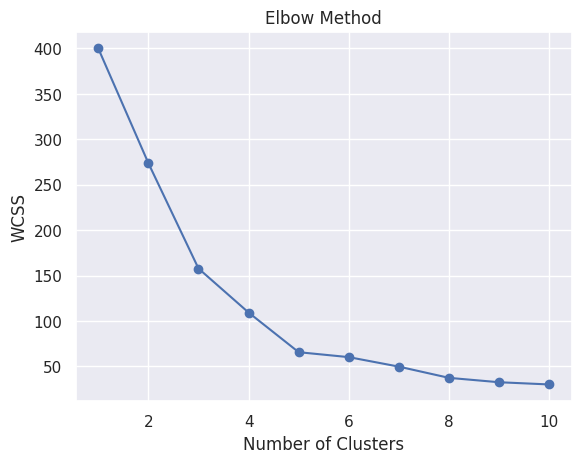

In [11]:
# -------------------------------
# Determine optimal number of clusters using Elbow Method
# -------------------------------
WCSS = []  # Within-Cluster Sum of Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x_scaled)
    WCSS.append(kmeans.inertia_)

# Plot the Elbow graph
sns.set()
plt.plot(range(1, 11), WCSS, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
# -------------------------------
# Fit KMeans with optimal number of clusters
# -------------------------------
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y = kmeans.fit_predict(x_scaled)
print(y)  # Cluster labels for each customer


[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


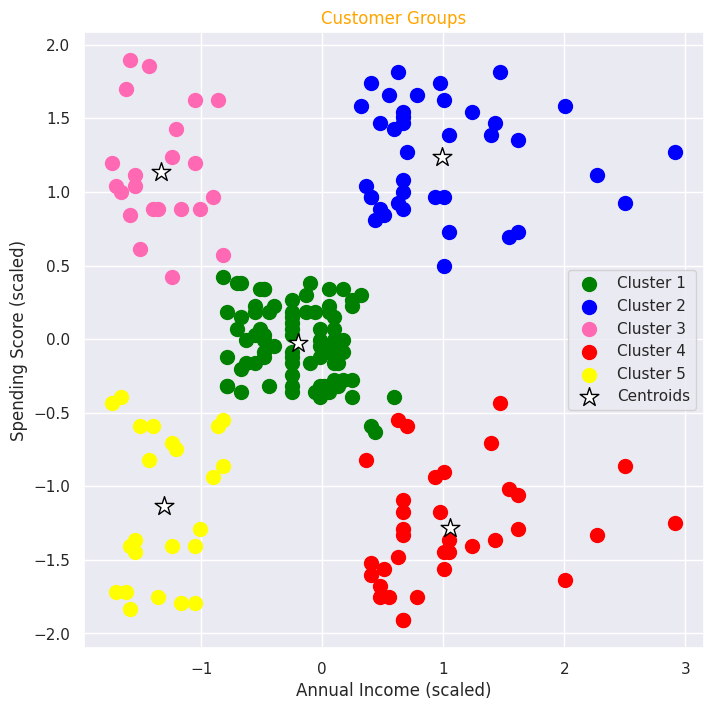

In [13]:
# -------------------------------
# Visualize clusters
# -------------------------------
plt.figure(figsize=(8, 8))
colors = ['green', 'blue', 'hotpink', 'red', 'yellow']

for i in range(5):
    plt.scatter(x_scaled[y==i, 0], x_scaled[y==i, 1],
                c=colors[i], s=100, label=f'Cluster {i+1}')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='white', edgecolor='black', s=200, marker='*', label='Centroids')

plt.title('Customer Groups', color='orange')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()

In [14]:
# -------------------------------
# Evaluate clustering with Silhouette Score
# -------------------------------
score = silhouette_score(x_scaled, y)
print(f"Silhouette Score: {score:.4f}")


Silhouette Score: 0.5547
